# Modeling - Support Vector Machine
(Using the non-interacted features)

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("main_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Price", "Future % Return", "Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

### PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()

In [7]:
X_pca = pca.fit_transform(X_train)

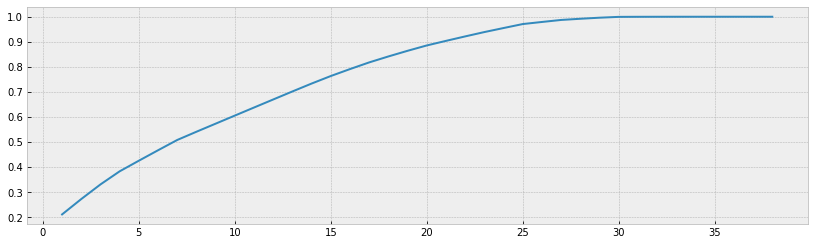

In [8]:
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,X_train.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

In [9]:
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = X.shape[1] - n_over_95

print(f"Number features: {n_to_reach_95}\tTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

Number features: 23	Total Variance Explained: 0.954963573916644


In [10]:
pca = PCA(n_components=n_to_reach_95)

X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

pca.explained_variance_ratio_.cumsum()[-1]

0.9388768459459146

## Support Vector Machine Modeling

In [11]:
from sklearn import svm

# Instantiating the classifier
clf = svm.LinearSVC()

In [12]:
# Fitting the model
%timeit clf.fit(X_pca_train, y_train)

# Getting predictions for the training set
svm_train_preds = clf.predict(X_pca_train)

# Getting predictions for the testing set
svm_test_preds = clf.predict(X_pca_test)

# Scores for both predictions
svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

# Printing Results
print("Support Vector Machine")
print(f"Training Accuracy: {svm_train_score} \t\t Testing Accuracy: {svm_test_score}")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


41.7 s ± 2.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Support Vector Machine
Training Accuracy: 0.4237210995812853 		 Testing Accuracy: 0.4197160021845986


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


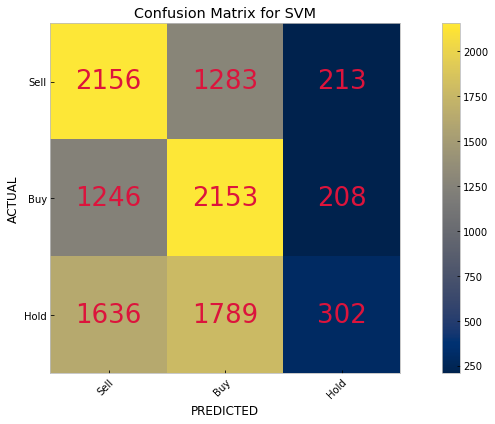

In [13]:
plot_confusion_matrix(y_test, svm_test_preds, title="Confusion Matrix for SVM")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [ ]:
# Support Vector Machine (linear)
# Training Accuracy: 0.4237210995812853 		 Testing Accuracy: 0.4197160021845986